In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/consume-complaints-dataset-fo-nlp/complaints_processed.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.models import Sequential
#from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
#from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
#from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
#import plotly.plotly as py
#import cufflinks
from IPython.core.interactiveshell import InteractiveShell
#import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
#cufflinks.go_offline()
#cufflinks.set_config_file(world_readable=True, theme='pearl')
# Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
data = pd.read_csv('../input/consume-complaints-dataset-fo-nlp/complaints_processed.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
data.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [5]:
data_n = data.drop(['Unnamed: 0'], axis= 1)

In [6]:
data_n.groupby(['product']).count()

,narrative
product,
credit_card,15566
credit_reporting,91172
debt_collection,23148
mortgages_and_loans,18990
retail_banking,13535


In [7]:
import plotly.express as px
fig = px.bar(data_n.groupby(['product']).count(),
             labels={
                     "product": "Product",
                     "value": "Count of Complaint",
                     "variable": "Variable"
                 },
                title="Count Complaint in Each Product")
fig.show()

# **Text Pre-processing**

In [8]:
data_n.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [9]:
def print_plot(index):
    example = data_n[data_n.index == index][['narrative', 'product']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])
print_plot(10)

beginning mortgage held mb financial mb mortgage portfolio purchased bank first quarter mb financial customer began fall behind mortgage payment due unemployment divorce house went foreclosure later sheriff sale home scheduled morning submitted hardship application end documentation specific date letter dated acknowledges application discussed next step never received written verbal confirmation regarding status hardship application day scheduled sheriff sale communication way sale never provided clear determination application made payment brought account current able taking loan group friend would lost home sheriff auction day sale received express mail letter dated date scheduled sheriff sale saying hardship application approved detail trial payment plan received letter timeframe required promised would take full loan friend would made required payment delay review option held numerous call since large payment told trial plan leading loan modification place payment plan fact made br

In [10]:
print_plot(70)

hello name trying reach several time get problem fixed receipted response far wrong adresses employment information exist credit account year addition also derogatory information appear credit report belong business address employment information need removed info priority expedite reported ar ar
Product: credit_reporting


In [11]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162421 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [12]:
data_n = data_n.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = str(text)
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    # replace REPLACE_BY_SPACE_RE symbols by space in text. 
    # substitute the matched string in REPLACE_BY_SPACE_RE with space.
    
    text = BAD_SYMBOLS_RE.sub('', text) 
    # remove symbols which are in BAD_SYMBOLS_RE from text. 
    # substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    #text = text.replace('x', '')
    #text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    # remove stopwors from text
    return text
data_n['narrative'] = data_n['narrative'].apply(clean_text)
data_n['narrative'] = data_n['narrative'].str.replace('\d+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning:

The default value of regex will change from True to False in a future version.



In [42]:
print_plot(30)

name last four account number writing dispute late payment reported impacted covid virus hospital long time lost job spoke advised payment deferred get credit alert reported past due violation care act late payment need removed pay account full correct credit report remove erroinious late fee told provided protection care act failed adhere offered one called received written notice term deferred plan rely rep told thought protected need make right comply care act fix credit reporting remove late fee call done account negative told going forebarace would put account credit limit illegal credit ruined udapp violation care act violation
Product: credit_reporting


In [13]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 110
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, 
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
                      lower=True)
tokenizer.fit_on_texts(data_n['narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 45960 unique tokens.


In [14]:
X = tokenizer.texts_to_sequences(data_n['narrative'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (162421, 110)


In [15]:
Y = pd.get_dummies(data_n['product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (162421, 5)


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(146178, 110) (146178, 5)
(16243, 110) (16243, 5)


# **Modelling**

In [17]:
## Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                              input_length=X.shape[1]),
    tf.keras.layers.SpatialDropout1D(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, 
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    #tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 110, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 110, 100)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 110, 512)          731136    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense (Dense)                (None, 5)                 1285      
Total params: 6,388,805
Trainable params: 6,388,805
Non-trainable params: 0
_________________________________________________________________


In [18]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)

# Convert class weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
model.fit(X_train, y_train, class_weight=class_weights_dict, ...)

SyntaxError: positional argument follows keyword argument (3972077302.py, line 11)

In [19]:
from tensorflow.keras.optimizers import Adam
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              optimizer= Adam(learning_rate=0.0001), metrics=["CategoricalAccuracy"])

In [20]:
## Make sure to use GPU before running this cell. 
num_epochs = 30
batch_size = 128
## For early stopping to ensure it doesnt overfit
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = model.fit(X_train, Y_train, 
                    epochs=num_epochs, batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=5,
                                             min_delta=0.0001)])

Epoch 1/30


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4847: UserWarning:

"`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



1028/1028 [==============================] - 71s 62ms/step - loss: 0.7827 - categorical_accuracy: 0.7033 - val_loss: 0.5072 - val_categorical_accuracy: 0.8177
Epoch 2/30
1028/1028 [==============================] - 62s 61ms/step - loss: 0.4691 - categorical_accuracy: 0.8376 - val_loss: 0.4186 - val_categorical_accuracy: 0.8570
Epoch 3/30
1028/1028 [==============================] - 62s 60ms/step - loss: 0.4061 - categorical_accuracy: 0.8612 - val_loss: 0.4036 - val_categorical_accuracy: 0.8634
Epoch 4/30
1028/1028 [==============================] - 62s 60ms/step - loss: 0.3718 - categorical_accuracy: 0.8731 - val_loss: 0.3893 - val_categorical_accuracy: 0.8674
Epoch 5/30
1028/1028 [==============================] - 62s 60ms/step - loss: 0.3473 - categorical_accuracy: 0.8817 - val_loss: 0.3907 - val_categorical_accuracy: 0.8665
Epoch 6/30
1028/1028 [==============================] - 62s 60ms/step - loss: 0.3272 - categorical_accuracy: 0.8881 - val_loss: 0.3747 - val_categorical_accuracy

In [23]:
model.save('c_model.h5')

In [24]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

508/508 [==============================] - 7s 14ms/step - loss: 0.3913 - categorical_accuracy: 0.8721
Test set
  Loss: 0.391
  Accuracy: 0.872


In [25]:
history.history

{'loss': [0.7826725244522095,
  0.4690740704536438,
  0.406101256608963,
  0.3718186616897583,
  0.3472558259963989,
  0.3271888792514801,
  0.3113754391670227,
  0.2975282371044159,
  0.28347280621528625,
  0.2725900709629059,
  0.26123958826065063,
  0.25131258368492126],
 'categorical_accuracy': [0.7033292651176453,
  0.8375797867774963,
  0.8612040281295776,
  0.8731149435043335,
  0.8817269802093506,
  0.8881347179412842,
  0.8942535519599915,
  0.8988674283027649,
  0.9039373397827148,
  0.908079981803894,
  0.911591649055481,
  0.9152781963348389],
 'val_loss': [0.5071946978569031,
  0.4186137914657593,
  0.403558611869812,
  0.38929176330566406,
  0.39070722460746765,
  0.37473633885383606,
  0.3715914487838745,
  0.373182088136673,
  0.3854842185974121,
  0.37854817509651184,
  0.38116276264190674,
  0.38942939043045044],
 'val_categorical_accuracy': [0.8176904916763306,
  0.856957197189331,
  0.8633875846862793,
  0.8674237132072449,
  0.8664659857749939,
  0.8722807765007019

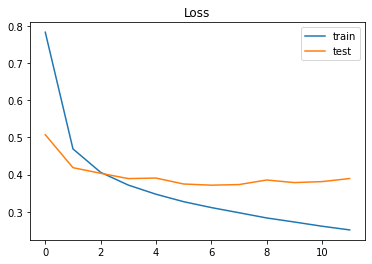

In [26]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

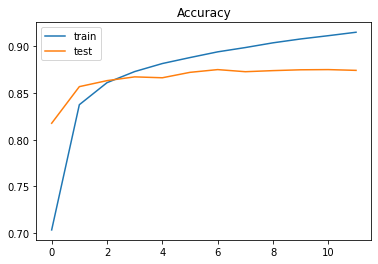

In [27]:
plt.title('Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.show();

# **Predict New Data**

In [28]:
new_complaint = ['I received a loan from XYZ bank, but I am having trouble making my payments on time due to unforeseen circumstances. I have reached out to the bank to discuss my options, but they have been unresponsive and have not provided any helpful solutions. I am concerned about the impact this will have on my credit score and financial stability, and I would like to find a resolution as soon as possible.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=110)
pred = model.predict(padded)
labels = ['credit_card',
'credit_reporting',
'debt_collection',
'mortgages_and_loans',
'retail_banking']
print(pred, labels[np.argmax(pred)])

[[0.02180873 0.03030567 0.06199099 0.801448   0.08444665]] mortgages_and_loans


In [31]:
json_string = model.to_json()